In [20]:
import pandas as pd
processed_data_path = "/home/pedro/AulaMachineLearning/machinelearning/data/processed/fato_appended.parquet.gzip"
df = pd.read_parquet(processed_data_path)



In [23]:
# df[(df['Name'] == 'SOL-USD')]['High'].value_counts().plot(kind="line")


,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276,SOL-USD
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444,SOL-USD
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897,SOL-USD
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285,SOL-USD
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614,SOL-USD
...,...,...,...,...,...,...,...,...
9955,2023-11-24,37296.316406,38415.339844,37261.605469,37720.281250,37720.281250,22922957823,BTC-USD
9956,2023-11-25,37721.414062,37892.429688,37617.417969,37796.792969,37796.792969,9099571165,BTC-USD
9957,2023-11-26,37796.828125,37820.300781,37162.750000,37479.121094,37479.121094,13744796068,BTC-USD
9958,2023-11-27,37454.191406,37559.355469,36750.128906,37254.167969,37254.167969,19002925720,BTC-USD


<Axes: xlabel='Date'>

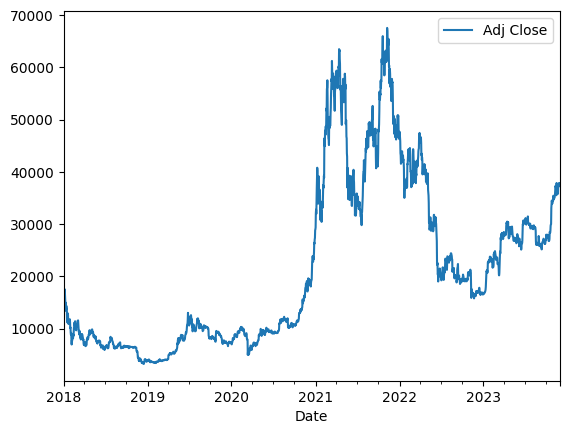

In [26]:
df.query(" Name == 'BTC-USD' ").plot("Date", "Adj Close")

In [27]:
df_selecionados = df[['Date', 'Adj Close', 'Name']]

In [28]:
df_selecionados

,Date,Adj Close,Name
0,2020-04-10,0.951054,SOL-USD
1,2020-04-11,0.776819,SOL-USD
2,2020-04-12,0.882507,SOL-USD
3,2020-04-13,0.777832,SOL-USD
4,2020-04-14,0.661925,SOL-USD
...,...,...,...
9955,2023-11-24,37720.281250,BTC-USD
9956,2023-11-25,37796.792969,BTC-USD
9957,2023-11-26,37479.121094,BTC-USD
9958,2023-11-27,37254.167969,BTC-USD


In [50]:
df_selecionados.columns = ['ds', 'y', 'unique_id']

In [51]:
from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression

mlf = MLForecast(
    models=[LinearRegression()],
    lags=[1,2,3,4,5],
    freq='D'
)

In [52]:
mlf.fit(df_selecionados)
predictions = mlf.predict(30)

In [53]:
from utilsforecast.plotting import plot_series

In [49]:
fig = plot_series(df_selecionados, predictions, max_ids=4, plot_random=False)
fig.savefig("index.png", bbox_inches='tight')